In [8]:
import pandas as pd
import numpy as np 
import scipy.interpolate as interp 
import matplotlib.pyplot as plt

In [12]:
x = np.array([0, 1, 2, 3, 4,5,6,7,8,9,10 ])
y = np.array([0, 1, 2, 3, 4,5,6,7,8,9,10])
z = np.array([0, 1, 4, 9, 16,25,36, 49,64,81,100])  # z = x^2

# Step 2: Fit the bivariate spline
spline = interp.SmoothBivariateSpline(x, y, z)

# Step 3: Evaluate the spline at new points (e.g., a grid)
xnew = np.linspace(0, 4, 100)
ynew = np.linspace(0, 4, 100)
X, Y = np.meshgrid(xnew, ynew)
Z = spline(X, Y)

# Step 4: Plot the result
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

# Show the plot
plt.show()

ValueError: The length of x, y and z should be at least (kx+1) * (ky+1)

In [22]:
import numpy as np
import scipy.interpolate as interp
import matplotlib.pyplot as plt

# Example data (adding more points to satisfy the requirement for kx=3, ky=3)
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])
y = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])
z = np.array([0, 1, 4, 9, 16, 25, 36, 49, 64, 81, 100, 121, 144, 169, 196, 225])

# Adjust spline degrees (optional) if not adding more points
# spline = interp.SmoothBivariateSpline(x, y, z, kx=2, ky=2)

# Create a SmoothBivariateSpline object
spline = interp.SmoothBivariateSpline(x, y, z)

# Evaluate the spline on a grid
xnew = np.linspace(min(x), max(x), 200)
ynew = np.linspace(min(y), max(y), 200)
X, Y = np.meshgrid(xnew, ynew)
Z = spline(X.ravel(), Y.ravel()).reshape(X.shape)

# Plotting the result
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
plt.show()


ValueError: x must be strictly increasing when `grid` is True

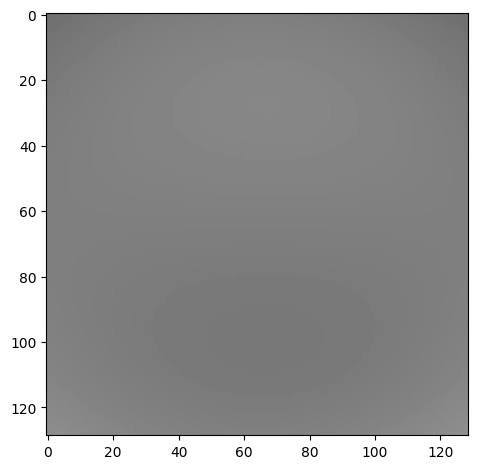

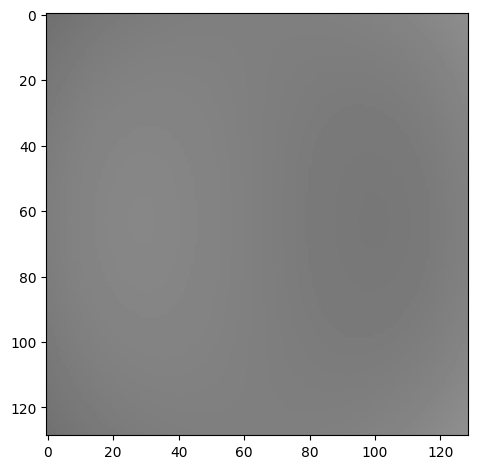

In [32]:
#!/bin/python3.7

"""

Use spline interpolation to on grid of x,y,z value where z is either xdiff or ydiff for use as imagemagick 2D displacement maps

"""

import numpy as np
from scipy.interpolate import SmoothBivariateSpline
from skimage import io


# python lists of x,y dst control points and zx=xsrc-xdiff, zy=ysrc-ydiff offsets to be interpolated over full image of size 129x129
x = [8.5, 20.5, 33.5, 48.5, 64.5, 80.5, 95.5, 109.5, 121.5, 5.5, 17.5, 31.5, 46.5, 64.5, 81.5, 97.5, 111.5, 123.5, 2.5, 14.5, 29.5, 45.5, 64.5, 83.5, 99.5, 113.5, 125.5, 1.5, 12.5, 26.5, 43.5, 64.5, 85.5, 103.5, 116.5, 127.5, 0.5, 11.5, 24.5, 41.5, 64.5, 87.5, 103.5, 117.5, 128.5, 1.5, 12.5, 25.5, 42.5, 64.5, 86.5, 103.5, 116.5, 127.5, 2.5, 14.5, 28.5, 45.5, 64.5, 83.5, 100.5, 114.5, 125.5, 5.5, 17.5, 30.5, 46.5, 64.5, 81.5, 97.5, 111.5, 123.5, 8.5, 19.5, 33.5, 48.5, 64.5, 80.5, 95.5, 109.5, 121.5]
y = [7.5, 5.5, 3.5, 1.5, 1.5, 1.5, 3.5, 5.5, 7.5, 20.5, 16.5, 14.5, 12.5, 11.5, 12.5, 15.5, 16.5, 19.5, 33.5, 31.5, 28.5, 26.5, 24.5, 26.5, 28.5, 31.5, 33.5, 48.5, 47.5, 45.5, 42.5, 40.5, 42.5, 45.5, 46.5, 48.5, 64.5, 64.5, 64.5, 64.5, 64.5, 64.5, 64.5, 64.5, 64.5, 80.5, 81.5, 83.5, 86.5, 87.5, 86.5, 83.5, 81.5, 80.5, 95.5, 97.5, 100.5, 103.5, 104.5, 102.5, 100.5, 97.5, 95.5, 109.5, 111.5, 114.5, 116.5, 117.5, 116.5, 114.5, 111.5, 109.5, 121.5, 123.5, 125.5, 127.5, 127.5, 127.5, 125.5, 123.5, 120.5]
zx = [119.5, 123.5, 126.5, 127.5, 127.5, 127.5, 128.5, 130.5, 134.5, 122.5, 126.5, 128.5, 129.5, 127.5, 126.5, 126.5, 128.5, 132.5, 125.5, 129.5, 130.5, 130.5, 127.5, 124.5, 124.5, 126.5, 130.5, 126.5, 131.5, 133.5, 132.5, 127.5, 122.5, 120.5, 123.5, 128.5, 127.5, 132.5, 135.5, 134.5, 127.5, 120.5, 120.5, 122.5, 127.5, 126.5, 131.5, 134.5, 133.5, 127.5, 121.5, 120.5, 123.5, 128.5, 125.5, 129.5, 131.5, 130.5, 127.5, 124.5, 123.5, 125.5, 130.5, 122.5, 126.5, 129.5, 129.5, 127.5, 126.5, 126.5, 128.5, 132.5, 119.5, 124.5, 126.5, 127.5, 127.5, 127.5, 128.5, 130.5, 134.5]
zy = [120.5, 122.5, 124.5, 126.5, 126.5, 126.5, 124.5, 122.5, 120.5, 123.5, 127.5, 129.5, 131.5, 132.5, 131.5, 128.5, 127.5, 124.5, 126.5, 128.5, 131.5, 133.5, 135.5, 133.5, 131.5, 128.5, 126.5, 127.5, 128.5, 130.5, 133.5, 135.5, 133.5, 130.5, 129.5, 127.5, 127.5, 127.5, 127.5, 127.5, 127.5, 127.5, 127.5, 127.5, 127.5, 127.5, 126.5, 124.5, 121.5, 120.5, 121.5, 124.5, 126.5, 127.5, 128.5, 126.5, 123.5, 120.5, 119.5, 121.5, 123.5, 126.5, 128.5, 130.5, 128.5, 125.5, 123.5, 122.5, 123.5, 125.5, 128.5, 130.5, 134.5, 132.5, 130.5, 128.5, 128.5, 128.5, 130.5, 132.5, 135.5]

# convert python lists to numpy arrays
ax = np.asarray(x)
ay = np.asarray(y)
azx = np.asarray(zx)
azy = np.asarray(zy)


# define bbox of interpolated data
# bbox=[minx, maxx, miny, maxy]
bbox=[0, 129, 0, 129]

# convert bbox to numpy array
abbox = np.asarray(bbox)

# do interpolations
xd = SmoothBivariateSpline(ax, ay, azx, w=None, bbox=abbox, kx=3, ky=3)
yd = SmoothBivariateSpline(ax, ay, azy, w=None, bbox=abbox, kx=3, ky=3)

# define integer grid onto which to interpolate
grid_x=np.linspace(0, 129, num=129)
grid_y=np.linspace(0, 129, num=129)


# evaluate at grid points
xdisplace = xd.__call__(grid_x, grid_y, grid=True)
ydisplace = yd.__call__(grid_x, grid_y, grid=True)

# save output using skimage
io.imsave("xdimgs.png", xdisplace.astype('uint8'))
io.imsave("ydimgs.png", ydisplace.astype('uint8'))

# view output using skimage
io.imshow(xdisplace.astype('uint8')) 
io.show()
io.imshow(ydisplace.astype('uint8')) 
io.show()

In [30]:
pip install scikit-image


   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
   -- ------------------------------------- 0.8/12.9 MB 5.6 MB/s eta 0:00:03
   ------- -------------------------------- 2.4/12.9 MB 6.7 MB/s eta 0:00:02
   ----------- ---------------------------- 3.7/12.9 MB 6.2 MB/s eta 0:00:02
   -------------- ------------------------- 4.7/12.9 MB 6.2 MB/s eta 0:00:02
   ------------------ --------------------- 6.0/12.9 MB 6.1 MB/s eta 0:00:02
   ---------------------- ----------------- 7.3/12.9 MB 6.2 MB/s eta 0:00:01
   --------------------------- ------------ 8.9/12.9 MB 6.4 MB/s eta 0:00:01
   ------------------------------ --------- 9.7/12.9 MB 6.2 MB/s eta 0:00:01
   ----------------------------------- ---- 11.5/12.9 MB 6.2 MB/s eta 0:00:01
   ---------------------------------------  12.6/12.9 MB 6.1 MB/s eta 0:00:01
   ---------------------------------------- 12.9/12.9 MB 6.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
